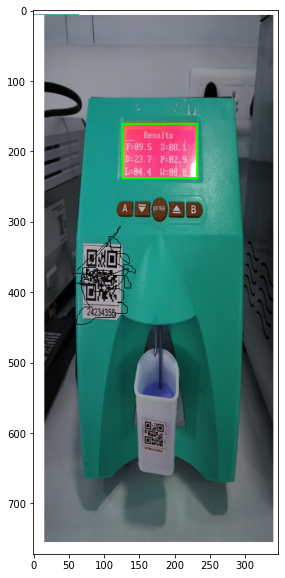

In [2]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import math

#read image
raw_img=cv2.imread("/home/ayush/Downloads/raw_image.png")
pic_n = raw_img.reshape(raw_img.shape[0]*raw_img.shape[1], raw_img.shape[2])
#find clusters 
kmeans = KMeans(n_clusters=5, random_state=0).fit(pic_n)

#find position on A button starting point and B button end point
raw_gray=cv2.cvtColor(raw_img,cv2.COLOR_BGR2GRAY)
A=cv2.imread('/home/ayush/Documents/a.png',0)
B=cv2.imread('/home/ayush/Documents/b.png',0)
w_B, h_B = B.shape[::-1]
res_a= cv2.matchTemplate(raw_gray,A,cv2.TM_CCOEFF_NORMED)
res_b= cv2.matchTemplate(raw_gray,B,cv2.TM_CCOEFF_NORMED)
threshold = 0.8
loc_a = np.where( res_a >= threshold)  
loc_b = np.where( res_b >= threshold)  
start_pt_a=list(zip(*loc_a[::-1]))[0]
start_pt_b=list(zip(*loc_b[::-1]))[0]
end_pt_B=start_pt_b[0]+w_B,start_pt_b[1]

#calculate distance between the points
dist = (math.hypot(end_pt_B[0] - start_pt_a[0], end_pt_B[1] - start_pt_a[1]))

#bounding box taking rough ratios of distance where screen may lie
start_rect=int(start_pt_a[0]*0.8),int(start_pt_a[1]-(dist))
end_rect=int(end_pt_B[0]*1.1),int(end_pt_B[1]-(dist*(1/8)))


#looping through clusters to find which one of them lie in our bounding box
Final_Top,Final_End=(0,0)
for i in range(5):
    mask = ([1 if a==i else 0 for a in kmeans.labels_])
    mask=np.array(mask).reshape(772, 348)
    (y, x) = np.where(mask == 1)
    Top = (np.min(x), np.min(y))
    End = (np.max(x), np.max(y))
    if(Top[0]>start_rect[0] and Top[1]>start_rect[1] and End[0]<end_rect[0] and End[1]<end_rect[1]):
        Final_Top=Top
        Final_End=End

plt.figure(figsize=(20,10))
plt.imshow(cv2.rectangle(raw_img.copy(), Final_Top, Final_End, (0,255,0), 2))